In [1]:
import pandas as pd

In [2]:
initial_df = pd.read_csv("Summer_olympic_Medals.csv")
initial_df

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
0,1896,Greece,Athens,Great Britain,GBR,2,3,2
1,1896,Greece,Athens,Hungary,HUN,2,1,3
2,1896,Greece,Athens,France,FRA,5,4,2
3,1896,Greece,Athens,United States,USA,11,7,2
4,1896,Greece,Athens,Germany,GER,6,5,2
...,...,...,...,...,...,...,...,...
1339,2020,Japan,Tokyo,Fiji,FIJ,1,0,1
1340,2020,Japan,Tokyo,Estonia,EST,1,0,1
1341,2020,Japan,Tokyo,Latvia,LAT,1,0,1
1342,2020,Japan,Tokyo,Bermuda,BER,1,0,0


In [3]:
hostMedals_df = initial_df[initial_df['Host_country'] == initial_df['Country_Name']]
    # > Dataframe com os resultados dos países sede
hostMedals_df

,Year,Host_country,Host_city,Country_Name,Country_Code,Gold,Silver,Bronze
7,1896,Greece,Athens,Greece,GRE,10,18,19
16,1900,France,Paris,France,FRA,27,38,37
35,1904,United States,St. Louis,United States,USA,76,78,77
51,1908,Great Britain,London,Great Britain,GBR,56,51,39
68,1912,Sweden,Stockholm,Sweden,SWE,24,24,17
96,1920,Belgium,Antwerp,Belgium,BEL,16,12,14
112,1924,France,Paris,France,FRA,13,15,10
139,1928,Netherlands,Amsterdam,Netherlands,NED,6,9,4
182,1932,United States,Los Angeles,United States,USA,41,32,30
203,1936,Germany,Berlin,Germany,GER,33,26,30


In [4]:
medalsPerYearAll_df = initial_df.groupby(['Country_Name', 'Year',]).sum(numeric_only=True).reset_index()
# > Dataframe com o resultado de todos os países em cada edição das olimpíadas
medalsPerYearAll_df

,Country_Name,Year,Gold,Silver,Bronze
0,Afghanistan,2008,0,0,1
1,Afghanistan,2012,0,0,1
2,Algeria,1984,0,0,2
3,Algeria,1992,1,0,1
4,Algeria,1996,2,0,1
...,...,...,...,...,...
1339,Zambia,1984,0,0,1
1340,Zambia,1996,0,1,0
1341,Zimbabwe,1980,1,0,0
1342,Zimbabwe,2004,1,1,1


In [5]:
medalsPerYear_df = medalsPerYearAll_df[medalsPerYearAll_df['Country_Name'].isin(hostMedals_df['Host_country'])]
    # > Dataframe com o resultado apenas dos países que sediaram olimpíadas
medalsPerYear_df['Total'] = medalsPerYear_df['Gold'] + medalsPerYear_df['Silver'] + medalsPerYear_df['Bronze']
    # > Adicionando a coluna com o total de medalhas de cada edição das olimpíadas
medalsPerYear_df

C:\Users\Ramon\AppData\Local\Temp\ipykernel_9524\318380740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medalsPerYear_df['Total'] = medalsPerYear_df['Gold'] + medalsPerYear_df['Silver'] + medalsPerYear_df['Bronze']


,Country_Name,Year,Gold,Silver,Bronze,Total
37,Australia,1896,2,0,0,2
38,Australia,1900,2,0,3,5
39,Australia,1904,0,3,1,4
40,Australia,1920,0,2,1,3
41,Australia,1924,3,1,2,6
...,...,...,...,...,...,...
1318,West Germany,1968,5,11,10,26
1319,West Germany,1972,13,11,16,40
1320,West Germany,1976,10,12,17,39
1321,West Germany,1984,17,19,23,59


In [6]:
medalsPerYear_df = medalsPerYear_df.merge(initial_df.filter(['Year', 'Host_country']), on='Year', how='left').drop_duplicates().reset_index(drop=True)
    # > Adicionado ao dataframe a informação da sede do evento
medalsPerYear_df

,Country_Name,Year,Gold,Silver,Bronze,Total,Host_country
0,Australia,1896,2,0,0,2,Greece
1,Australia,1900,2,0,3,5,France
2,Australia,1904,0,3,1,4,United States
3,Australia,1920,0,2,1,3,Belgium
4,Australia,1924,3,1,2,6,France
...,...,...,...,...,...,...,...
428,West Germany,1968,5,11,10,26,Mexico
429,West Germany,1972,13,11,16,40,West Germany
430,West Germany,1976,10,12,17,39,Canada
431,West Germany,1984,17,19,23,59,United States


In [7]:
for country in pd.unique(medalsPerYear_df['Country_Name']):
    # > Selecionar valores únicos da coluna
    temp_df = medalsPerYear_df[medalsPerYear_df['Country_Name'] == country]
        # > Dataframe temporário para cada país único
    tempData_df = temp_df.groupby(['Country_Name']).agg({'Gold':['mean','max'], 'Silver':['mean','max'], 'Bronze':['mean','max'], 'Total':['mean','max']})
        # > Dataframe com os dados de média e valor máximo de cada medalha
    tempHostIn_df = temp_df[temp_df['Host_country'] == country].set_index('Country_Name').drop(columns=['Year', 'Host_country'])
        # > Dataframe com os dados de quando os países foram sede
    display(tempData_df)
    display(tempHostIn_df)

Gold        Silver        Bronze          Total    
                  mean max      mean max      mean max       mean max
Country_Name                                                         
Australia     6.074074  17  6.407407  25  7.777778  23  20.259259  58

,Gold,Silver,Bronze,Total
Country_Name,,,,
Australia,16,25,17,58


Gold        Silver        Bronze         Total    
                  mean max      mean max      mean max      mean max
Country_Name                                                        
Belgium       1.769231  16  2.192308  12  2.307692  14  6.269231  42

,Gold,Silver,Bronze,Total
Country_Name,,,,
Belgium,16,12,14,42


Gold     Silver     Bronze     Total    
              mean max   mean max   mean max  mean max
Country_Name                                          
Brazil        1.85   7    2.1   6   3.55  10   7.5  21

,Gold,Silver,Bronze,Total
Country_Name,,,,
Brazil,7,6,6,19


Gold        Silver        Bronze          Total    
                 mean max      mean max      mean max       mean max
Country_Name                                                        
Canada        2.62963  10  4.037037  18  5.407407  16  12.074074  44

,Gold,Silver,Bronze,Total
Country_Name,,,,
Canada,0,5,6,11


Gold     Silver     Bronze     Total     
              mean max   mean max   mean max  mean  max
Country_Name                                           
China         26.2  48   19.9  32   17.3  30  63.4  100

,Gold,Silver,Bronze,Total
Country_Name,,,,
China,48,22,30,100


Gold        Silver        Bronze          Total    
                  mean max      mean max      mean max       mean max
Country_Name                                                         
Finland       3.884615  15  3.269231  13  4.576923  13  11.730769  37

,Gold,Silver,Bronze,Total
Country_Name,,,,
Finland,6,3,13,22


Gold        Silver        Bronze          Total     
                  mean max      mean max      mean max       mean  max
Country_Name                                                          
France        7.689655  27  8.689655  38  9.551724  37  25.931034  102

,Gold,Silver,Bronze,Total
Country_Name,,,,
France,27,38,37,102
France,13,15,10,38


Gold         Silver         Bronze          Total    
                   mean max       mean max       mean max       mean max
Country_Name                                                            
Germany       11.882353  33  12.176471  26  14.529412  30  38.588235  89

,Gold,Silver,Bronze,Total
Country_Name,,,,
Germany,33,26,30,89


Gold     Silver         Bronze          Total     
                   mean max   mean max       mean max       mean  max
Country_Name                                                         
Great Britain  9.793103  56   11.0  51  10.862069  39  31.655172  146

,Gold,Silver,Bronze,Total
Country_Name,,,,
Great Britain,56,51,39,146
Great Britain,3,14,6,23
Great Britain,29,17,19,65


Gold     Silver     Bronze     Total    
              mean max   mean max   mean max  mean max
Country_Name                                          
Greece        1.75  10   2.25  18   2.05  19  6.05  47

,Gold,Silver,Bronze,Total
Country_Name,,,,
Greece,10,18,19,47
Greece,6,6,4,16


Gold        Silver        Bronze          Total    
                  mean max      mean max      mean max       mean max
Country_Name                                                         
Italy         8.111111  14  6.962963  12  7.888889  20  22.962963  40

,Gold,Silver,Bronze,Total
Country_Name,,,,
Italy,13,10,13,36


Gold        Silver        Bronze          Total    
                  mean max      mean max      mean max       mean max
Country_Name                                                         
Japan         7.681818  27  6.818182  14  8.090909  21  22.590909  58

,Gold,Silver,Bronze,Total
Country_Name,,,,
Japan,16,5,8,29
Japan,27,14,17,58


Gold        Silver        Bronze         Total    
                  mean max      mean max      mean max      mean max
Country_Name                                                        
Mexico        0.619048   3  1.142857   3  1.666667   4  3.428571   9

,Gold,Silver,Bronze,Total
Country_Name,,,,
Mexico,3,3,3,9


Gold        Silver        Bronze          Total    
                  mean max      mean max      mean max       mean max
Country_Name                                                         
Netherlands   3.653846  12  4.038462  12  4.692308  14  12.384615  36

,Gold,Silver,Bronze,Total
Country_Name,,,,
Netherlands,6,9,4,19


Gold        Silver        Bronze          Total    
                  mean max      mean max      mean max       mean max
Country_Name                                                         
South Korea   5.647059  13  5.352941  15  5.882353  12  16.882353  33

,Gold,Silver,Bronze,Total
Country_Name,,,,
South Korea,12,10,11,33


Gold         Silver         Bronze           Total     
                   mean max       mean max       mean max        mean  max
Country_Name                                                              
Soviet Union  43.888889  80  35.444444  69  32.888889  46  112.222222  195

,Gold,Silver,Bronze,Total
Country_Name,,,,
Soviet Union,80,69,46,195


Gold     Silver     Bronze     Total    
             mean max   mean max   mean max  mean max
Country_Name                                         
Spain         2.4  13    3.6  11    2.4   6   8.4  22

,Gold,Silver,Bronze,Total
Country_Name,,,,
Spain,13,7,2,22


Gold        Silver       Bronze         Total    
                  mean max      mean max     mean max      mean max
Country_Name                                                       
Sweden        5.481481  24  6.518519  24  6.62963  25  18.62963  65

,Gold,Silver,Bronze,Total
Country_Name,,,,
Sweden,24,24,17,65


Gold         Silver         Bronze          Total     
                    mean max       mean max       mean max       mean  max
Country_Name                                                              
United States  37.857143  83  29.714286  78  26.357143  77  93.928571  231

,Gold,Silver,Bronze,Total
Country_Name,,,,
United States,76,78,77,231
United States,41,32,30,103
United States,83,61,30,174
United States,44,32,25,101


Gold     Silver     Bronze     Total    
              mean max   mean max   mean max  mean max
Country_Name                                          
West Germany  11.2  17   13.4  19   16.2  23  40.8  59

,Gold,Silver,Bronze,Total
Country_Name,,,,
West Germany,13,11,16,40


In [8]:
host_years = {}
for nation in hostMedals_df['Host_country'].unique():
    years = hostMedals_df[hostMedals_df['Host_country'] == nation]['Year'].to_list()
    host_years[nation] = years

- GRAPHIC

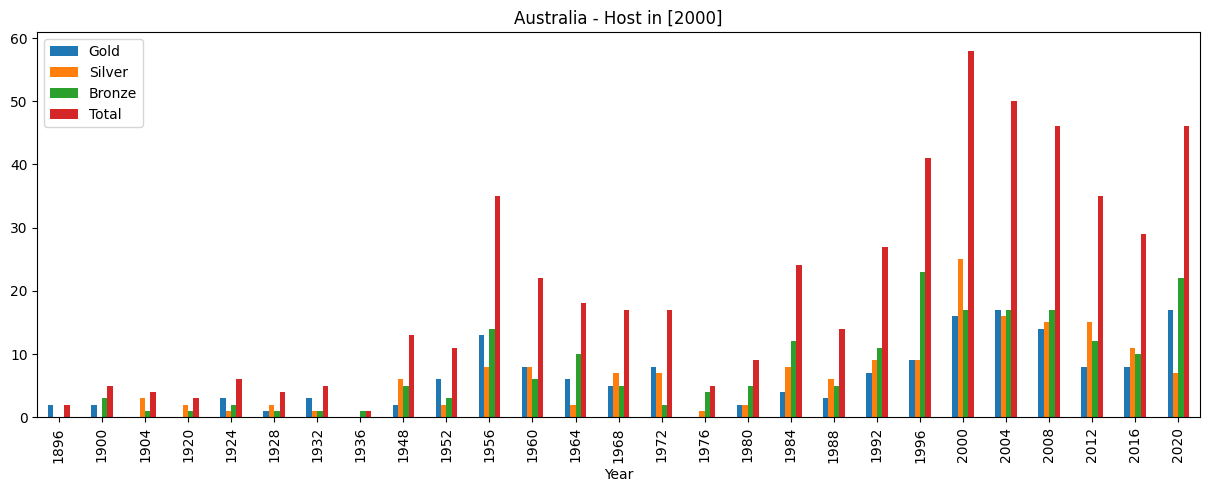

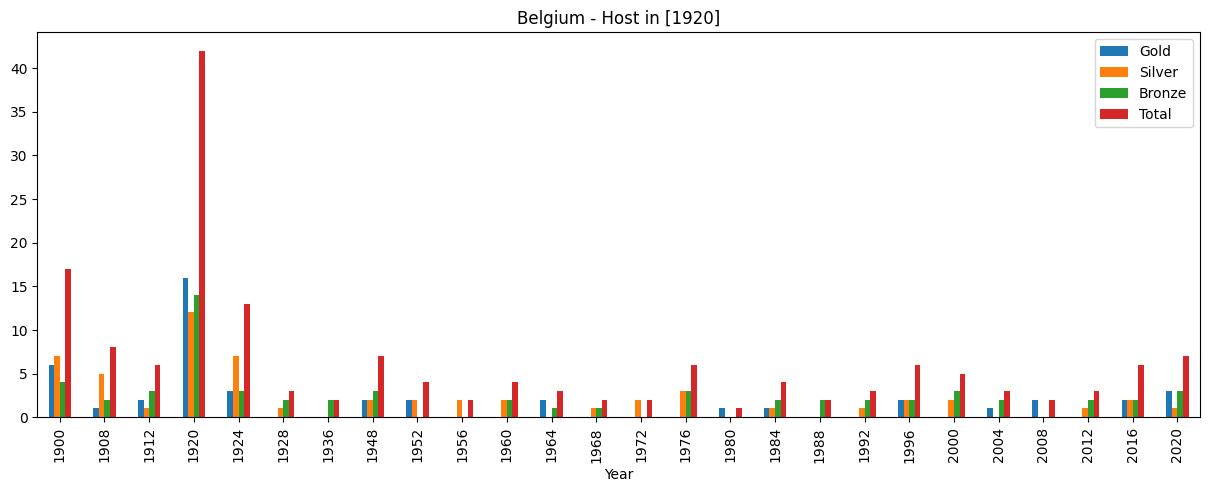

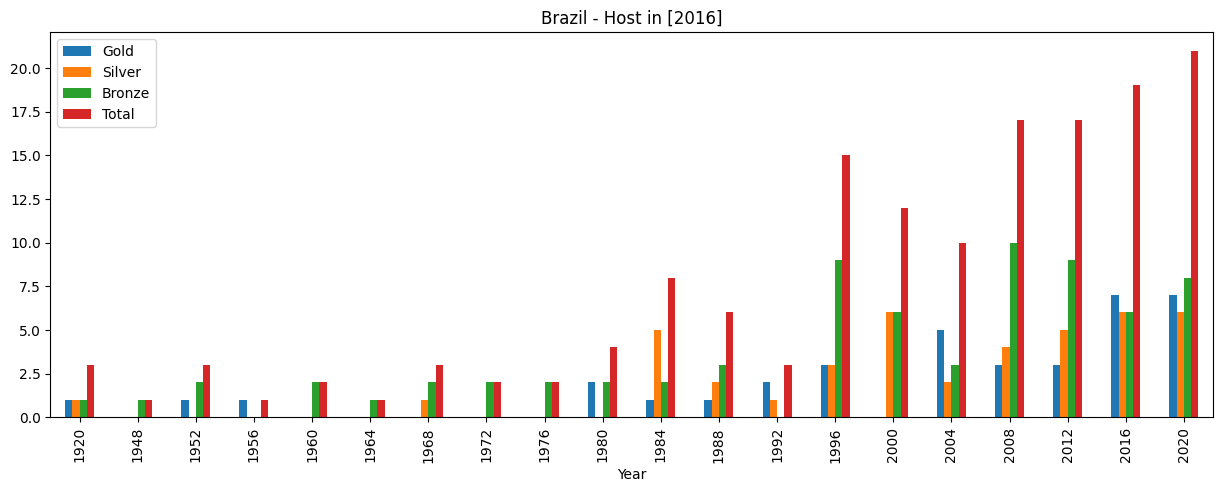

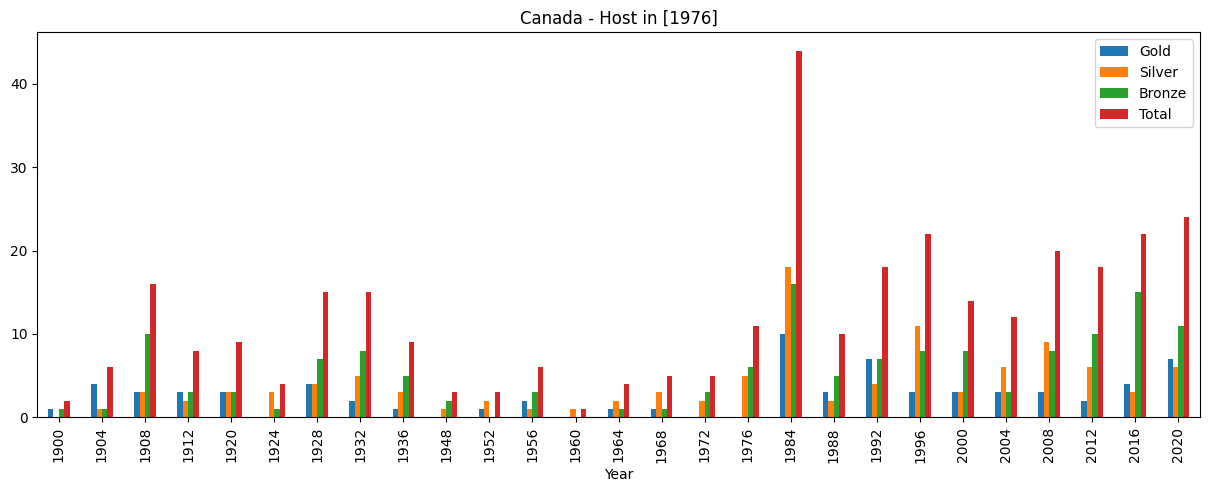

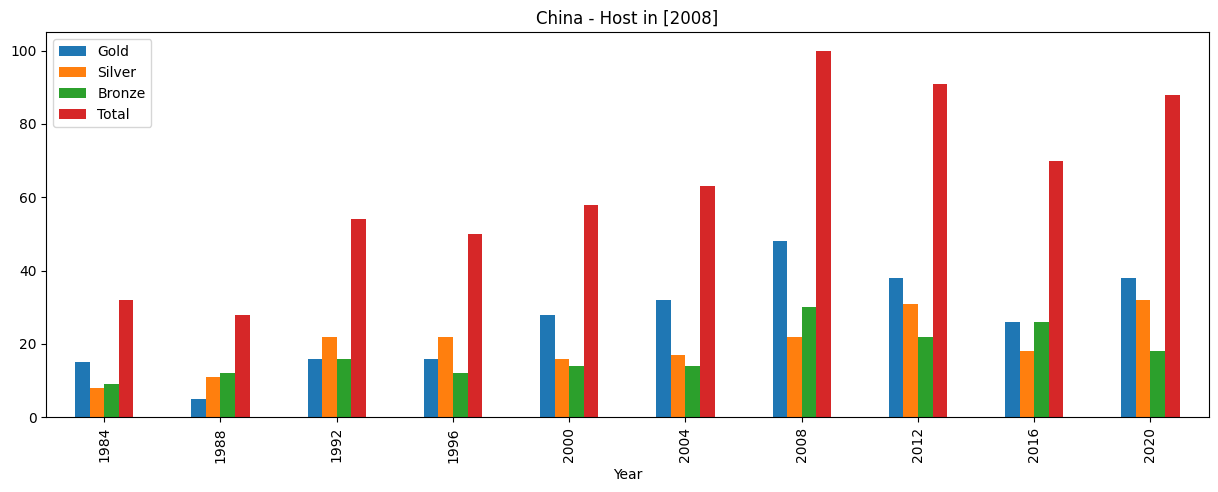

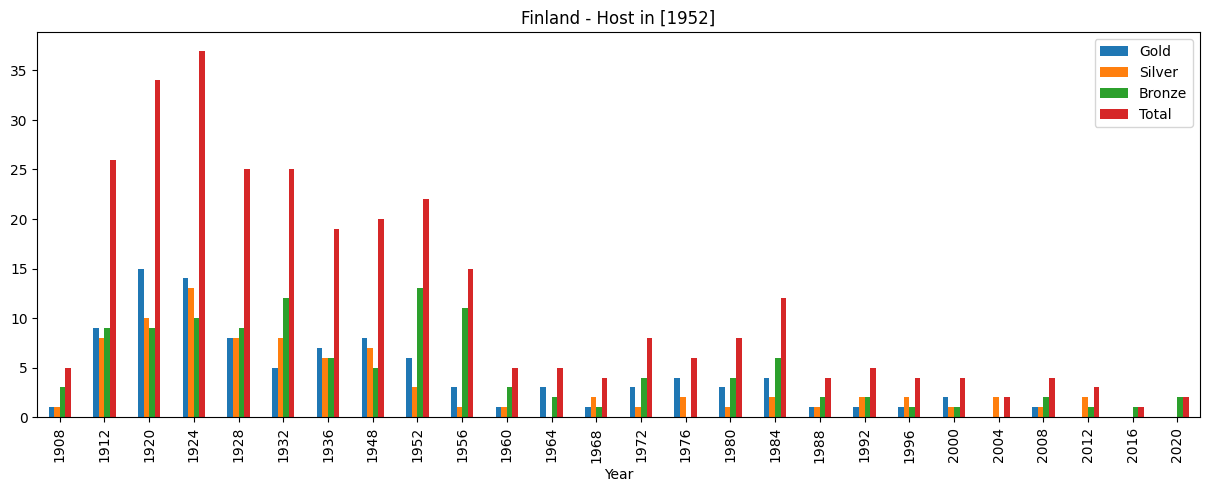

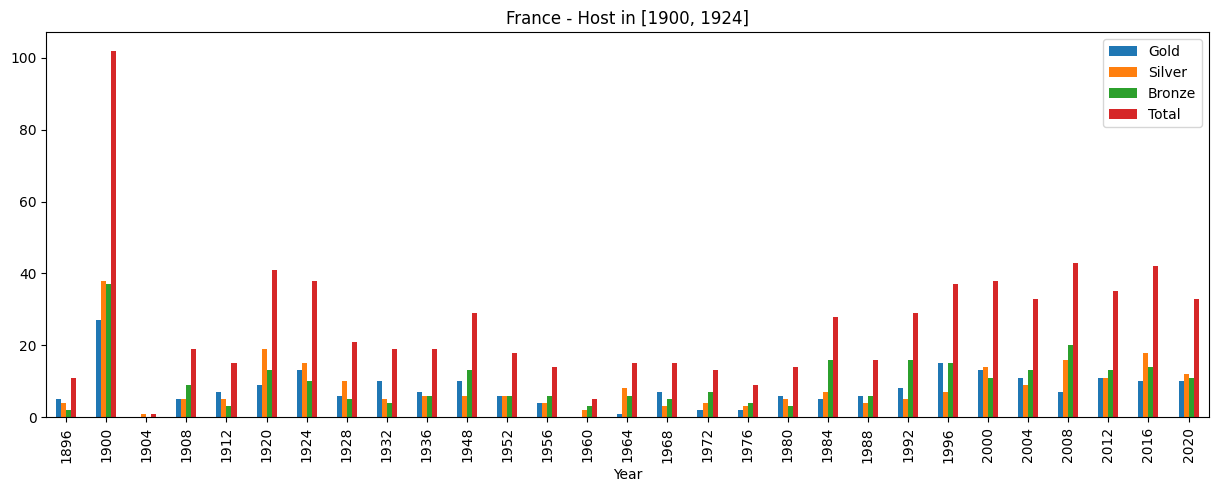

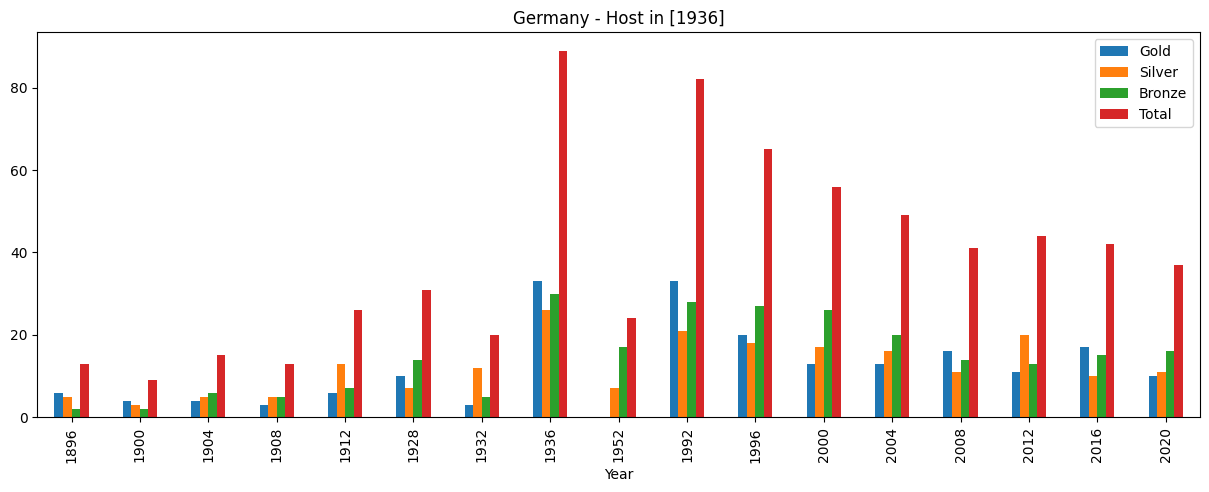

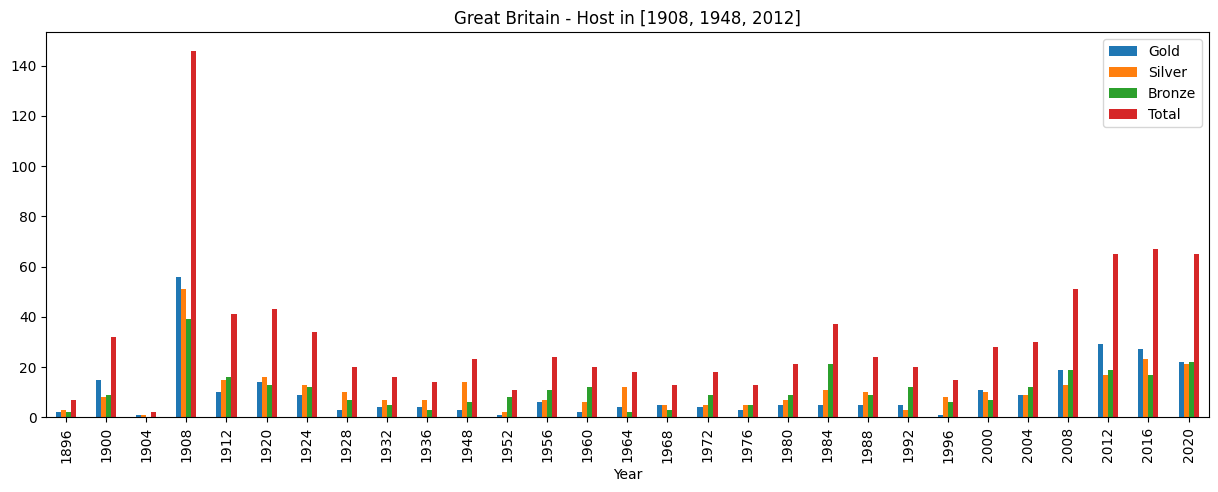

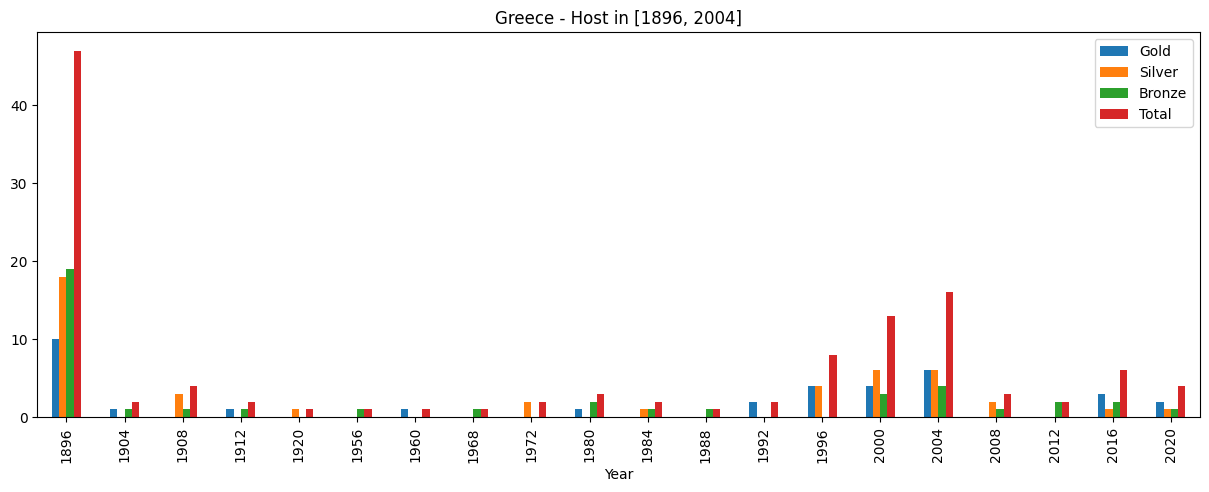

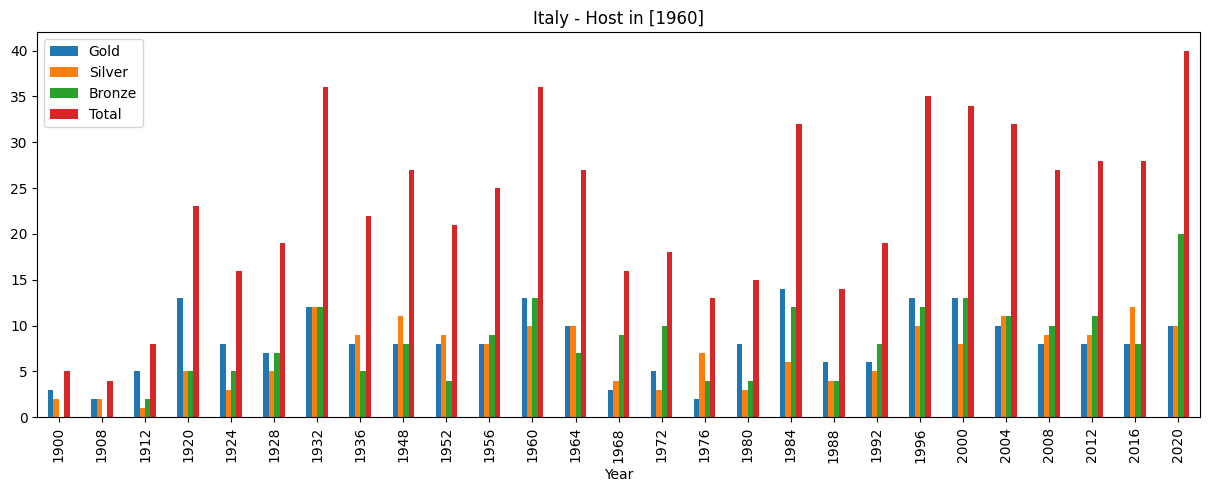

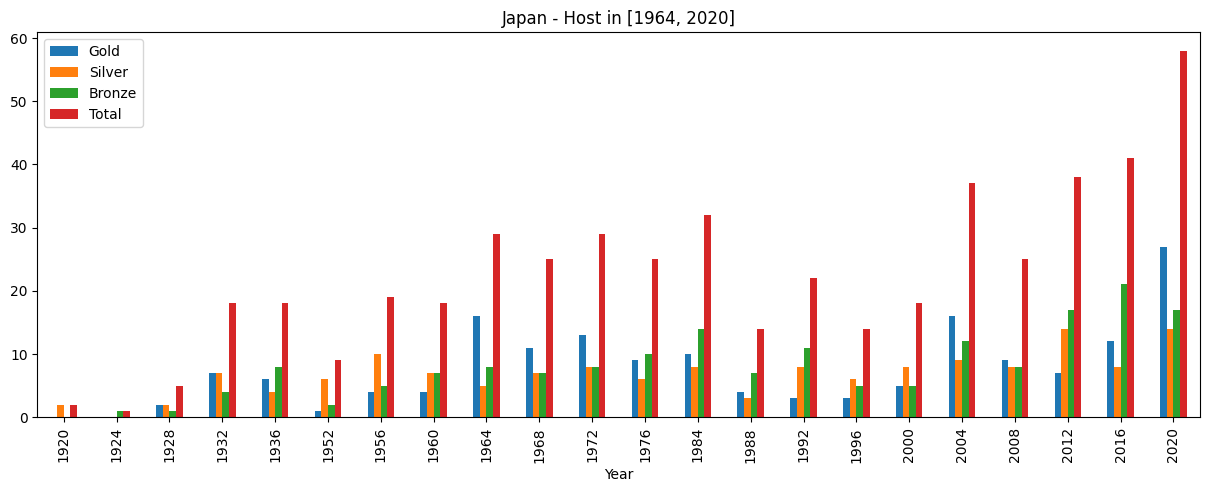

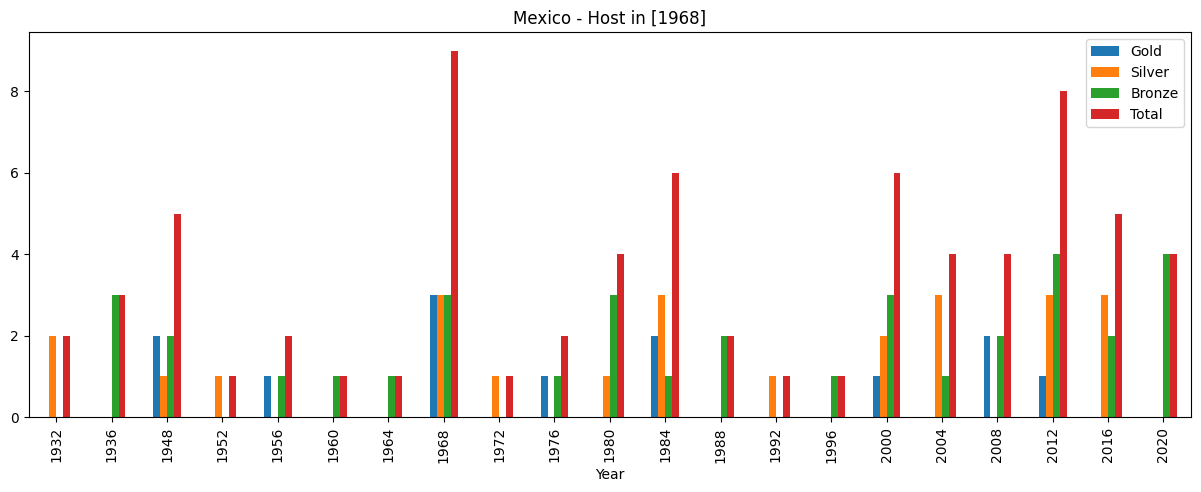

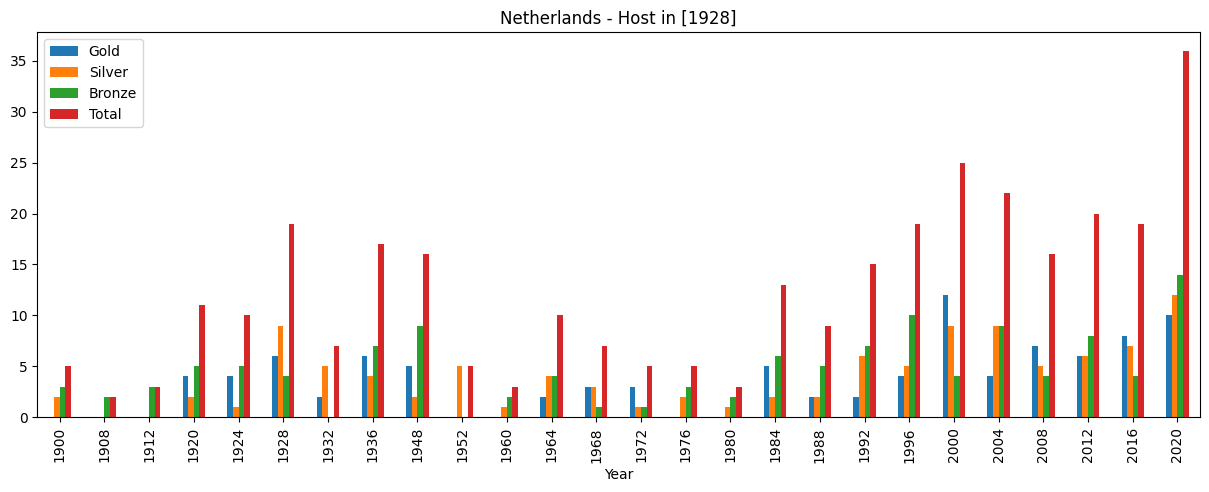

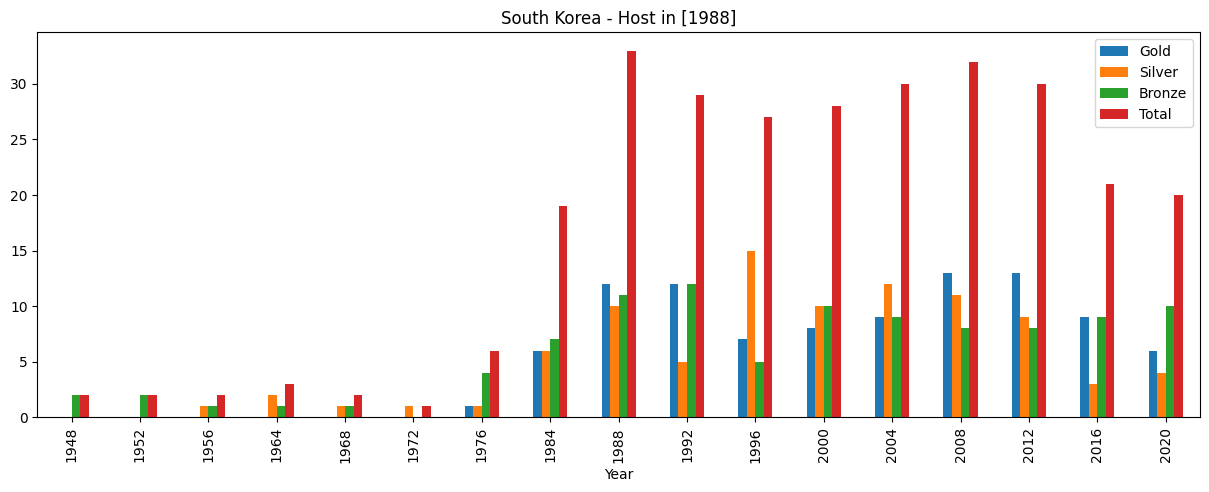

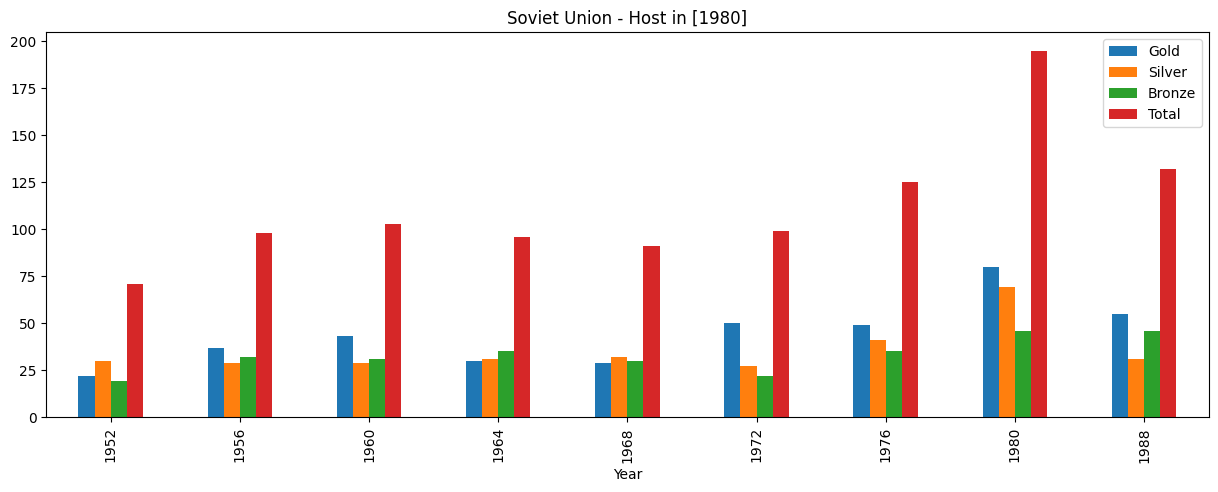

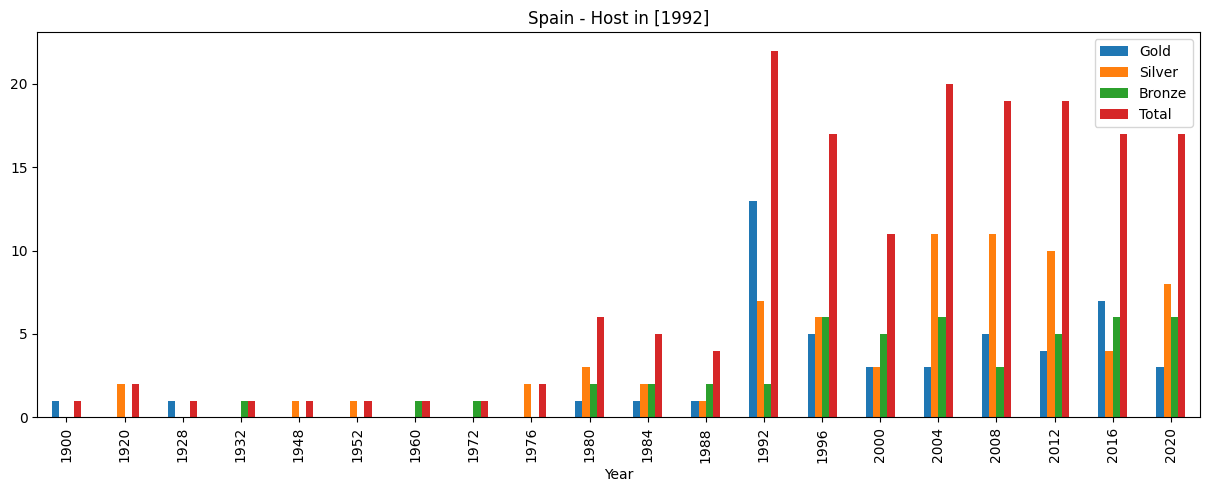

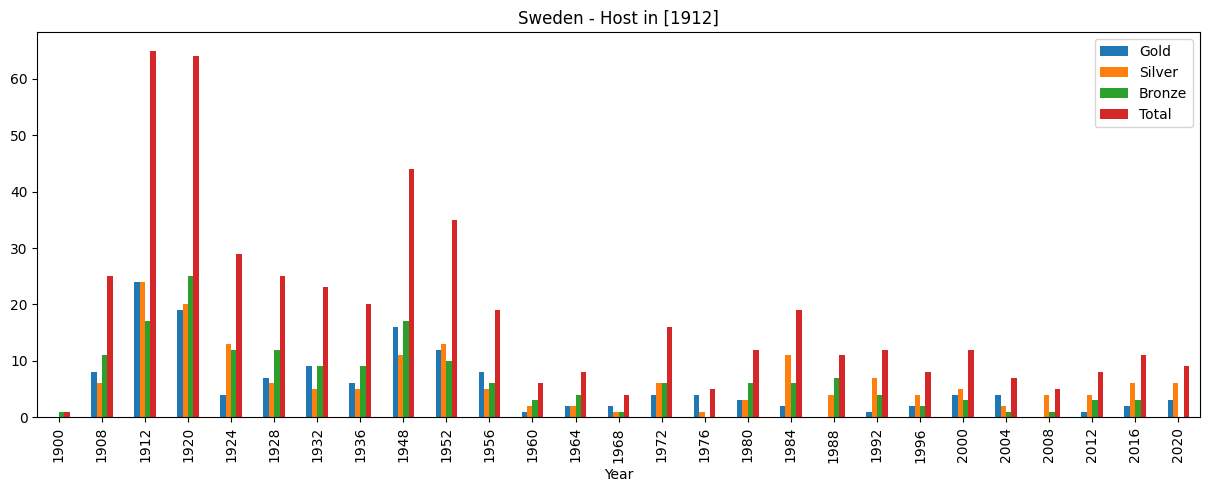

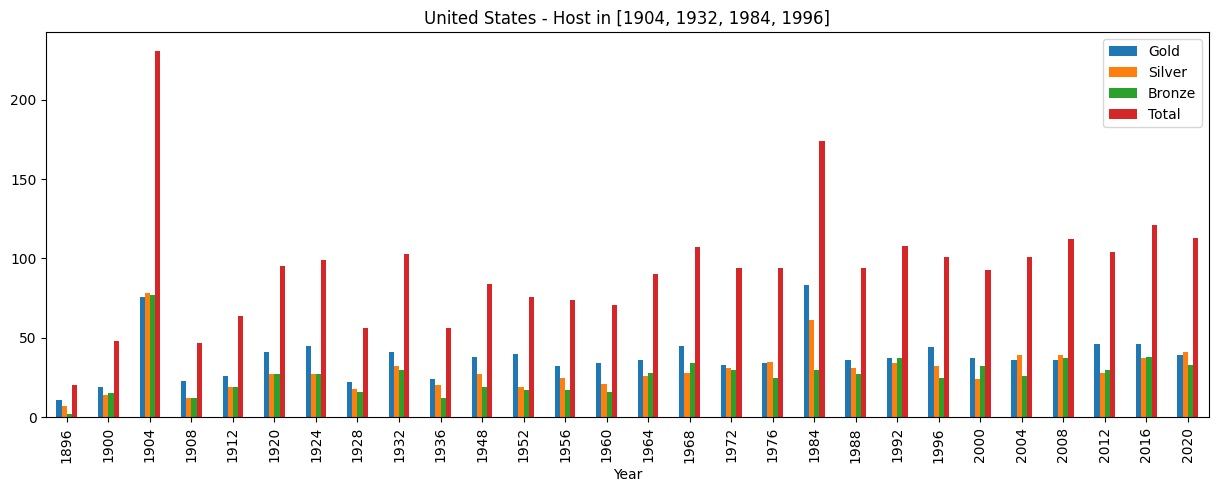

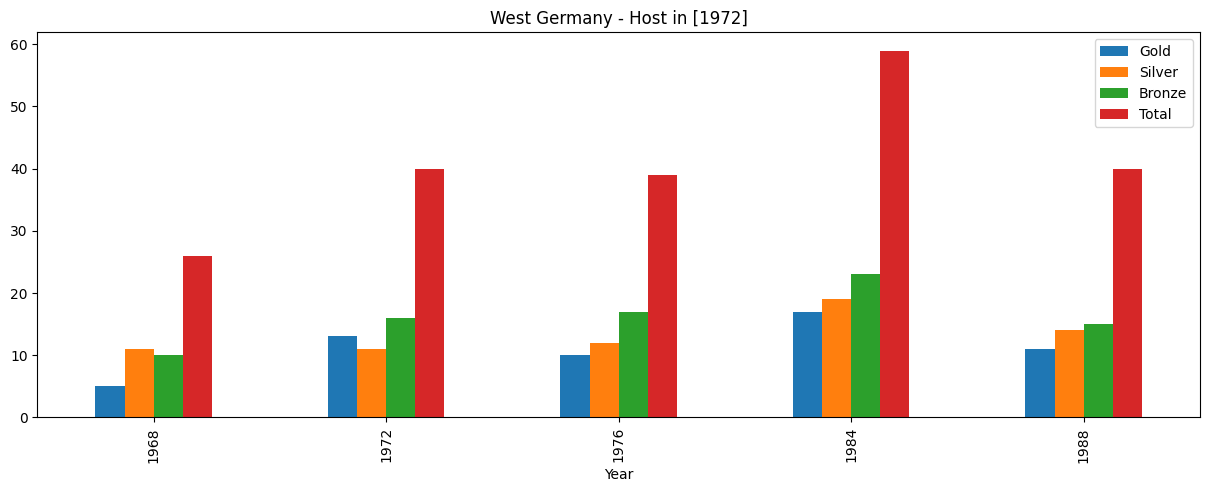

In [9]:
for country in pd.unique(medalsPerYear_df['Country_Name']):
    medalsPerYear_df[medalsPerYear_df['Country_Name'] == country].plot(kind='bar',x='Year', title=f'{country} - Host in {host_years[country]}', figsize=[15, 5])
        # > Gera o gráfico com o desempenho do país nas olimpíadas que participou, informando qual foi o ano em que foi sede do evento